# 활성화 함수 (Activation Funtion)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-5, 5, 100)

### 계단함수 (Step Function)

- 입력값이 0 이상이면 1, 그렇지 않으면 1 출력
- 미분 불가하고, 작은 변화에도 값이 급격히 변하여 역전파 학습에 부적합

In [ ]:
def step_function(x) :
    return np.where(x >= 0, 1, 0)  #np.where : np의 조건문. (조건, 참일때 값, 아닐 때 값)

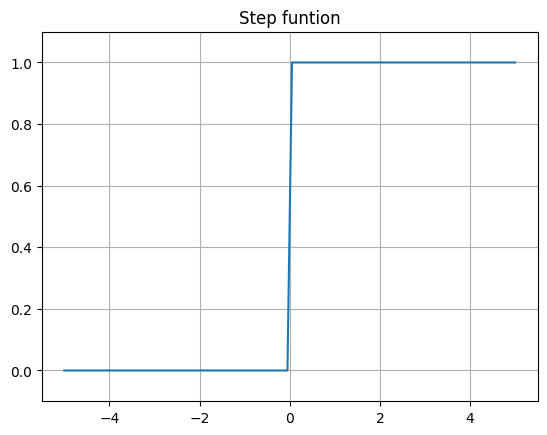

In [ ]:
plt.Figure(figsize=(5, 3))
plt.plot(X, step_function(X))
plt.title('Step funtion')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()     # 0일때는 1값을 가짐. 단층퍼셉트론에서는 출력층에서 이진부류에 유리해 활성함수로 사용을 하지만, 다층에서는 미분이 불가해서 사용안함. 

### 시그모이드 함수 (Sigmoid Funtion)
- 출력 범위: (0, 1)
- 매끄러운 S자 곡선 형태로 확률 해석 가능
- 기울기 소실(Vanishing Gradient) 문제 발생 가능

In [5]:
def sigmoid(x) : 
    return 1 / (1 + np.exp(-x))

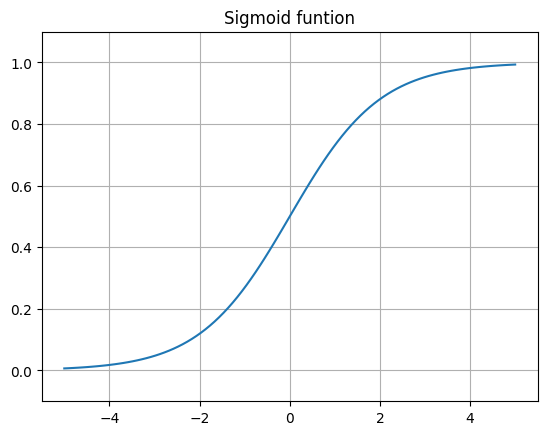

In [ ]:
plt.Figure(figsize=(5, 3))
plt.plot(X, sigmoid(X))
plt.title('Sigmoid funtion')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()   # x 값이 마이너스 무한대나 무한대로 갈 때, 기울기가 0에 수렴함. 

### 하이퍼볼릭 탄젠트 함수 (hyperbolic tangent, Tanh)
- 출력 범위 : (-1, 1)
- 시그모이드보다 중심이 0에 가까워 더 빠른 학습 진행 가능
- 기울기 소실 문제 발생 가능

In [ ]:
def tanh(x) : 
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))  # 직접 계산

In [ ]:
def tanh(x) : 
    return np.tanh(x)  # numpy의 tanh 함수 활용

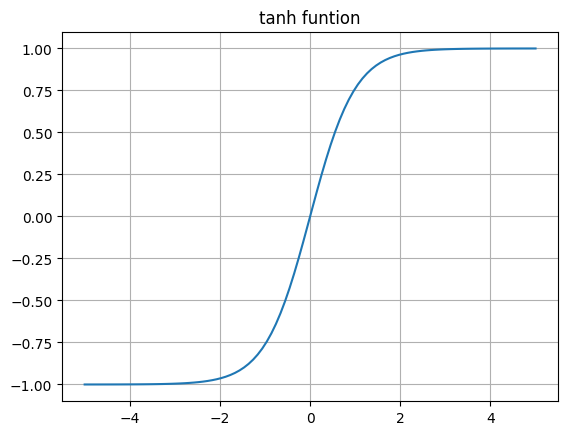

In [ ]:
plt.Figure(figsize=(5, 3))
plt.plot(X, tanh(X))
plt.title('tanh funtion')
plt.grid()
plt.show()  # 시그모이드 함수와 형태는 유사하나 y 중심값이 0이 됨. 중심이 0이기 때문에 양수, 음수에 대한 결과값을 반환해 다양한 결과값을 줌. 오차역전파법에 이점. 

### ReLU (Recitified Linear Unit)
- 출력 범위: $(0, \infty)$
- 음수 입력에 대해 0을 출력하여 계산이 간단하고 학습 속도가 빠름
- 죽은 뉴런(Dying ReLU) 문제 발생 가능 

In [11]:
def relu(x) :
    return np.maximum(0, x)

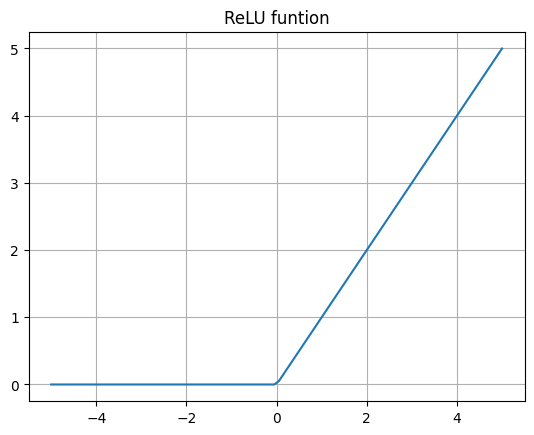

In [ ]:
plt.Figure(figsize=(5, 3))
plt.plot(X, relu(X))
plt.title('ReLU funtion')
plt.grid()
plt.show()  

### Leaky ReLU 
- 출력 범위: $(-\infty, \infty)$
- ReLU의 죽은 뉴런 문제를 해결하기 위해 음수 입력에 작은 기울기 $\alpha$를 적용 ($\alpha$는 일반적으로 0.01 사용)

In [19]:
def leaky_relu(x, alpha=0.1) : 
    return np.where(x >= 0, x, alpha * x)

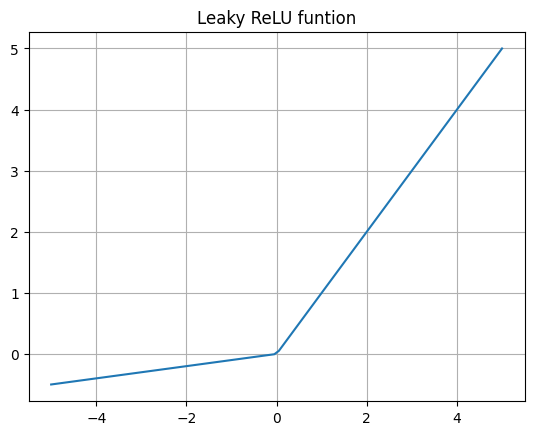

In [24]:
plt.Figure(figsize=(5, 3))
plt.plot(X, leaky_relu(X))
plt.title('Leaky ReLU funtion')
plt.grid()
plt.show()

------------------

In [29]:
import pandas as pd 

np.random.seed(42)
X = np.random.uniform(-5, 5, size=10)

df = pd.DataFrame({
    'input (X)' : X, 
    'Step funtion' : step_function(X), 
    'Sigmoid' : sigmoid(X), 
    'Tanh' : tanh(X), 
    'ReLU' : relu(X), 
    'Leaky ReLU' : leaky_relu(X)
})

df

,input (X),Step funtion,Sigmoid,Tanh,ReLU,Leaky ReLU
0,-1.254599,0,0.221905,-0.849568,0.000000,-0.125460
1,4.507143,1,0.989090,0.999757,4.507143,4.507143
2,2.319939,1,0.910515,0.980867,2.319939,2.319939
3,0.986585,1,0.728413,0.755902,0.986585,0.986585
4,-3.439814,0,0.031074,-0.997945,0.000000,-0.343981
5,-3.440055,0,0.031067,-0.997946,0.000000,-0.344005
6,-4.419164,0,0.011901,-0.999710,0.000000,-0.441916
7,3.661761,1,0.974956,0.998681,3.661761,3.661761
8,1.011150,1,0.733245,0.766237,1.011150,1.011150
9,2.080726,1,0.889016,0.969308,2.080726,2.080726


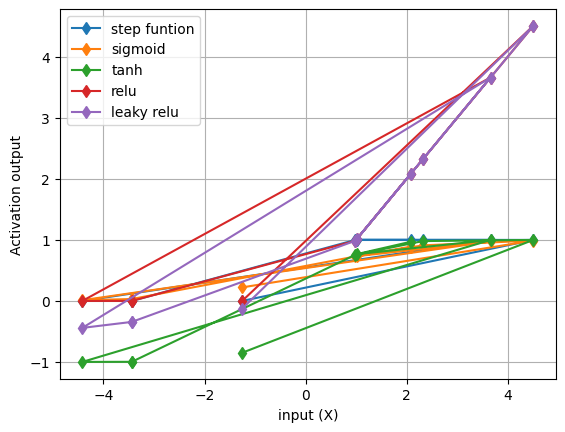

In [ ]:
plt.Figure(figsize=(8, 6))
plt.plot(df['input (X)'], df['Step funtion'], marker='d', label ='step funtion')
plt.plot(df['input (X)'], df['Sigmoid'], marker='d', label ='sigmoid')
plt.plot(df['input (X)'], df['Tanh'], marker='d', label ='tanh')
plt.plot(df['input (X)'], df['ReLU'], marker='d', label ='relu')
plt.plot(df['input (X)'], df['Leaky ReLU'], marker='d', label ='leaky relu')

plt.xlabel('input (X)')
plt.ylabel('Activation output')
plt.legend()
plt.grid()
plt.show()

# leaky, relu는 유사한 형태를 보이고, 시그모이드와 tanh, step 의 경우 y 값이 1 이상으로 올라가지 않는 것을 알 수 있음. 